In [1]:
import pandas as pd

# Load the Parquet file
df = pd.read_parquet('./vantage_furniture_tutorial.parquet')


In [2]:
# Show the DataFrame columns
print(df.columns)


Index(['meta_category_l1', 'meta_category_l2', 'meta_category_l3',
       'meta_category_l4', 'id', 'meta_rating', 'meta_numratings',
       'meta_image', 'text'],
      dtype='object')


In [3]:
# Print the first 10 rows of the DataFrame
print(df.head(10))


  meta_category_l1 meta_category_l2       meta_category_l3  \
0    Home & Living        Furniture  Living Room Furniture   
1    Home & Living        Furniture  Living Room Furniture   
2    Home & Living        Furniture  Living Room Furniture   
3    Home & Living        Furniture  Living Room Furniture   
4    Home & Living        Furniture  Living Room Furniture   
5    Home & Living        Furniture  Living Room Furniture   
6    Home & Living        Furniture  Living Room Furniture   
7    Home & Living        Furniture  Living Room Furniture   
8    Home & Living        Furniture  Living Room Furniture   
9    Home & Living        Furniture  Living Room Furniture   

            meta_category_l4  \
0  Console Tables & Cabinets   
1  Console Tables & Cabinets   
2                       None   
3        Couches & Loveseats   
4        Coffee & End Tables   
5  Console Tables & Cabinets   
6        Coffee & End Tables   
7        Coffee & End Tables   
8  Console Tables & Cabinets 

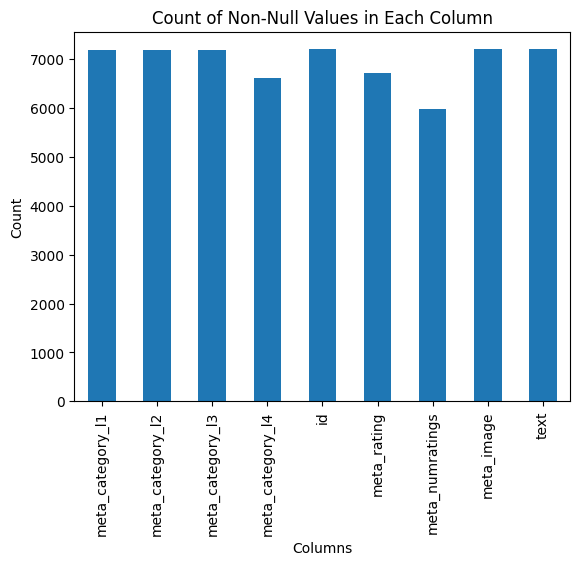

In [4]:
import matplotlib.pyplot as plt

# Plot the count of non-null values for each column
df.count().plot(kind='bar')
plt.title('Count of Non-Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.show()


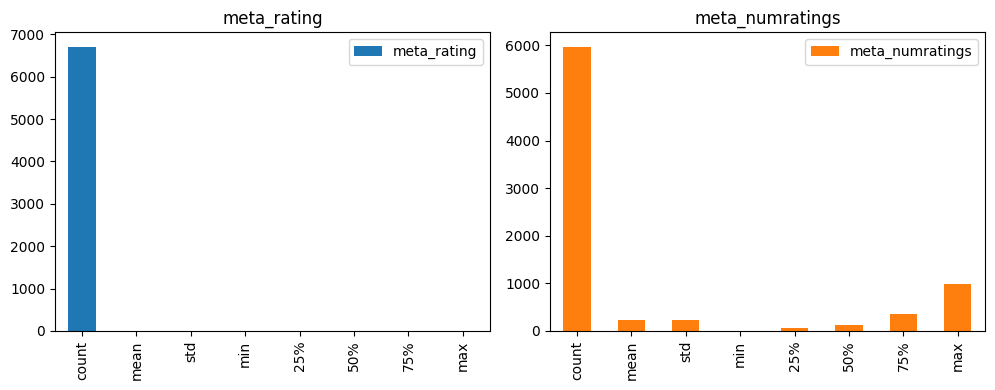

In [5]:
import numpy as np
import math

# Select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
num_cols = len(numeric_cols)

# Calculate the layout size
cols_per_row = 3  # You can adjust this number
rows = math.ceil(num_cols / cols_per_row)

# Adjust the figsize based on the number of rows and columns
figsize_width = cols_per_row * 5
figsize_height = rows * 4

# Plot statistics for numeric columns
df[numeric_cols].describe().plot(kind='bar', subplots=True, layout=(rows, cols_per_row), figsize=(figsize_width, figsize_height))
plt.tight_layout()
plt.show()


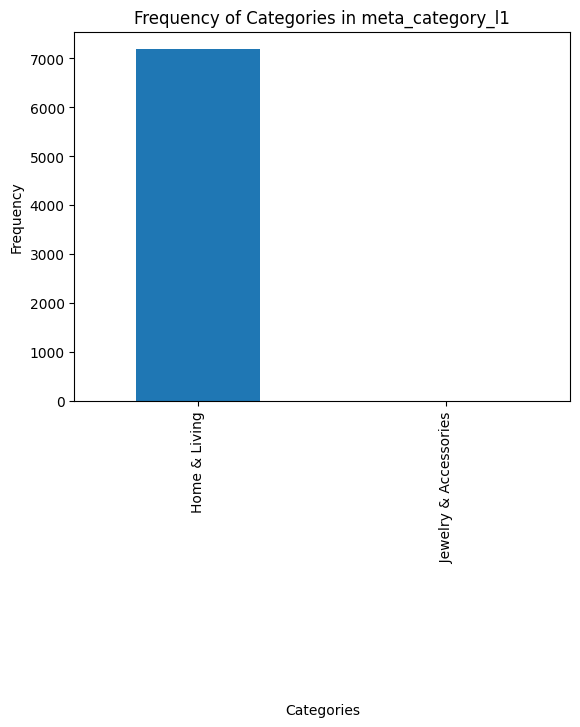

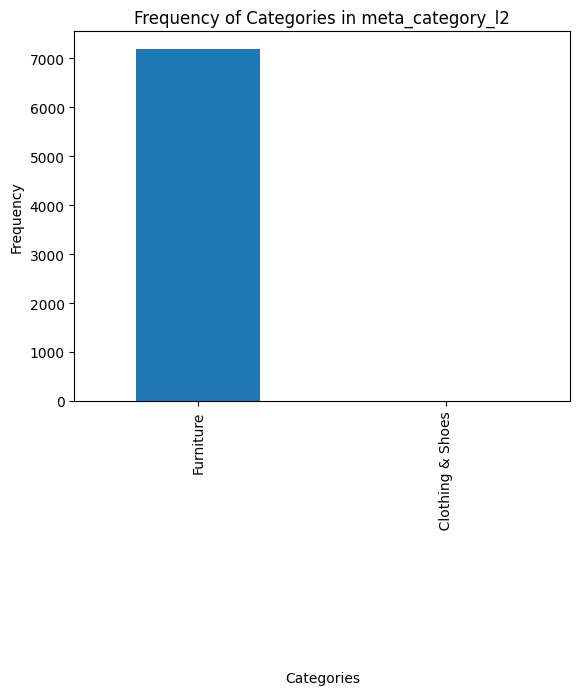

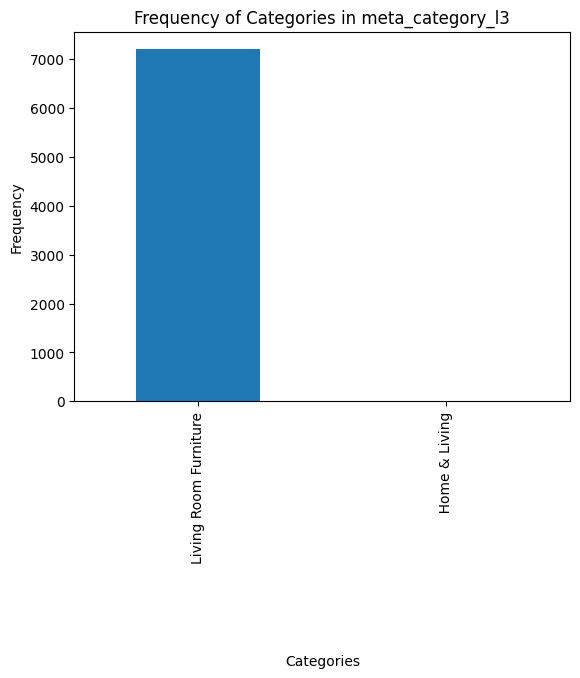

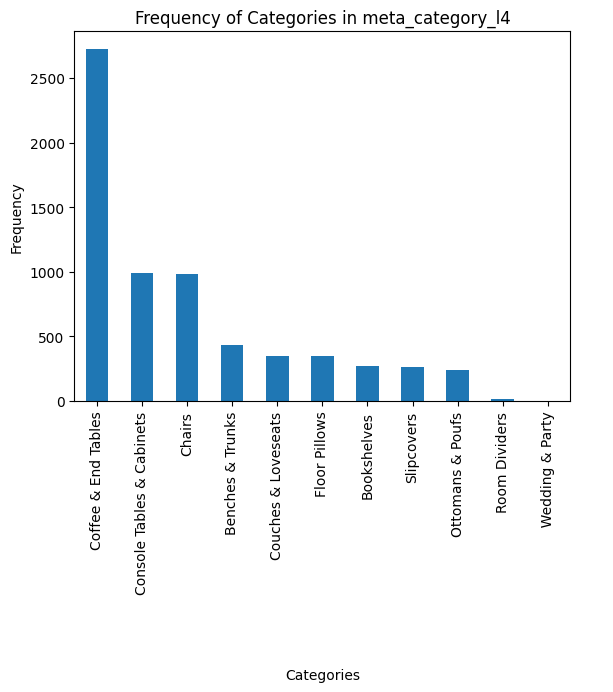

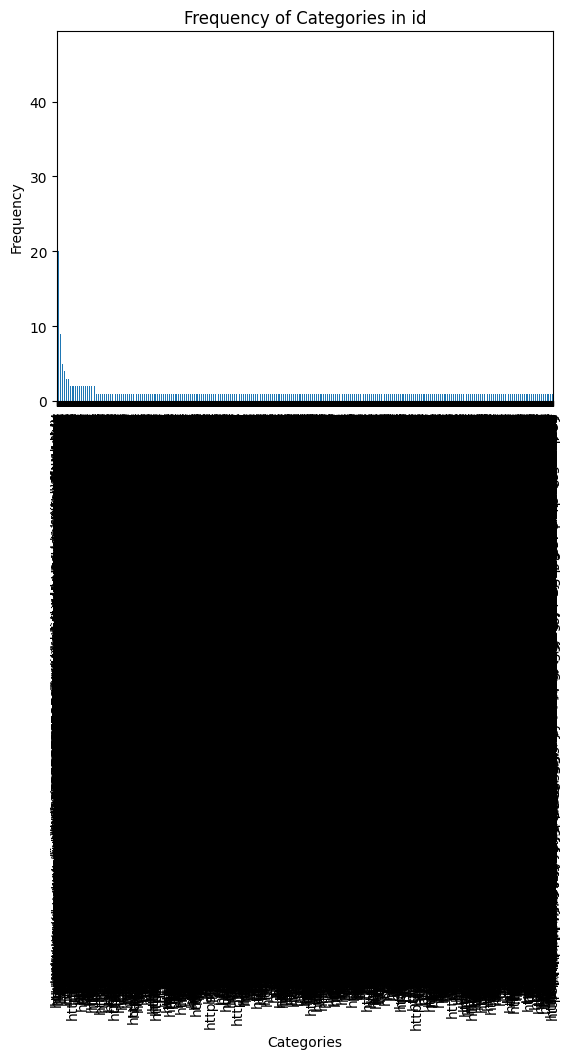

KeyboardInterrupt: 

In [6]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Plot the frequency of categories for each categorical column
for col in categorical_cols:
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Frequency of Categories in {col}')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
import pandas as pd
import hashlib
from urllib.parse import urlparse, unquote

# Function to create MD5 hash of a string
def create_md5_hash(string):
    return hashlib.md5(string.encode()).hexdigest()

# Function to transform URL slug into a title
def url_to_title(url):
    parsed_url = urlparse(url)
    title = parsed_url.path.split('/')[-1].replace('-', ' ')
    title = unquote(title)
    return title.title()

# Function to bucket ratings
def bucket_rating(rating):
    if rating == 5.0:
        return '5 stars'
    elif rating >= 4.0:
        return '4 stars and up'
    elif rating >= 3.0:
        return '3 stars and up'
    elif rating >= 2.0:
        return '2 stars and up'
    else:
        return 'Less than 2 stars'

# Function to bucket number of ratings
def bucket_numratings(numratings):
    if numratings == 0:
        return 'none'
    elif numratings < 10:
        return 'few'
    elif numratings < 100:
        return 'dozens'
    elif numratings < 1000:
        return 'hundreds'
    else:
        return '1000+'

# 1. Drop specified columns
df.drop(['meta_category_l1', 'meta_category_l2', 'meta_category_l3'], axis=1, inplace=True)

# 2. Rename 'meta_category_l4' to 'meta_category'
df.rename(columns={'meta_category_l4': 'meta_category'}, inplace=True)

# 3. Rename 'meta_rating' to 'noop_rating'
df.rename(columns={'meta_rating': 'noop_rating'}, inplace=True)

# 4. Create 'meta_rating_bucket' from 'noop_rating'
df['meta_rating_bucket'] = df['noop_rating'].apply(bucket_rating)

# 5. Rename 'meta_numratings' to 'noop_numratings'
df.rename(columns={'meta_numratings': 'noop_numratings'}, inplace=True)

# 6. Create 'meta_numratings_bucket' from 'noop_numratings'
df['meta_numratings_bucket'] = df['noop_numratings'].apply(bucket_numratings)

# Creating a new column 'noop_description' with the first 255 characters of the 'description' column
df['noop_description'] = df['text'].str.slice(0, 255)

# Display the modified DataFrame
df.head()
